In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from datetime import datetime
from datetime import timedelta
%matplotlib inline

In [2]:
uber_data= pd.read_csv('Uber Drives 2016.csv')

In [3]:
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
uber_data.head(60)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [5]:
uber_data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [6]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
uber_data['CATEGORY*'].unique()

array(['Business', 'Personal', nan], dtype=object)

In [8]:
uber_data['CATEGORY*'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1151    False
1152    False
1153    False
1154    False
1155     True
Name: CATEGORY*, Length: 1156, dtype: bool

In [9]:
uber_data.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [10]:
uber_data['START_DATE*'].isnull().sum()

0

In [11]:
uber_data['START*'].nunique()

177

In [12]:
uber_data['STOP*'].nunique()

188

In [13]:
uber_data['PURPOSE*'].isnull().sum()

503

In [14]:
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


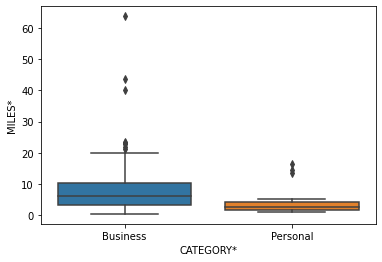

In [15]:
sns.boxplot(data=uber_data.head(200) , x='CATEGORY*', y='MILES*')

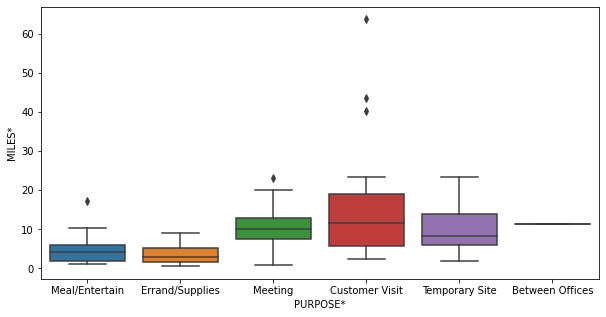

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=uber_data.head(200) , x='PURPOSE*', y='MILES*')

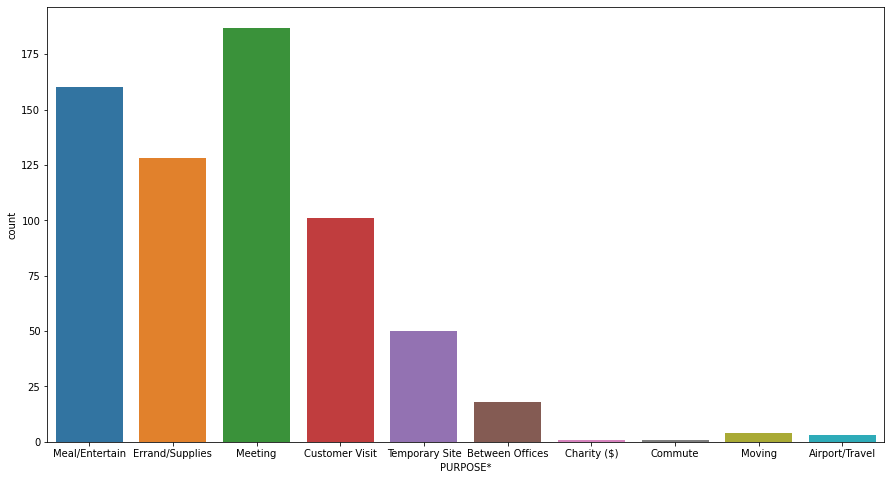

In [17]:
plt.figure(figsize=(15,8))

sns.countplot(data=uber_data, x='PURPOSE*')

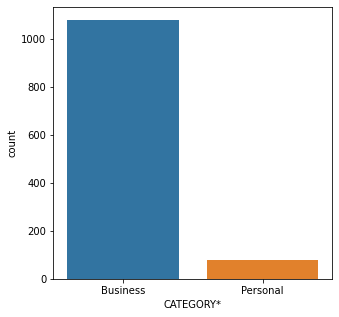

In [18]:
plt.figure(figsize=(5,5))

sns.countplot(data=uber_data, x='CATEGORY*')

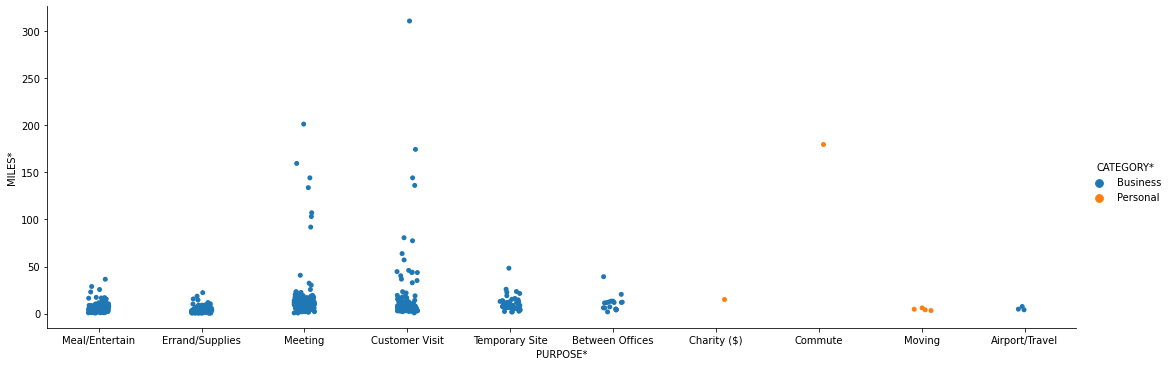

In [19]:
sns.catplot(data=uber_data, x='PURPOSE*', y='MILES*', hue='CATEGORY*',  aspect=3)

In [20]:
#here are the top 5 trips of start destinations
uber_data['START*'].value_counts().head()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: START*, dtype: int64

In [21]:
uber_data['MILES*']

0           5.1
1           5.0
2           4.8
3           4.7
4          63.7
         ...   
1151        3.9
1152       16.2
1153        6.4
1154       48.2
1155    12204.7
Name: MILES*, Length: 1156, dtype: float64

In [22]:
#here is the farthest start and stop pairs
#here Latta and Jacksonville are the farthest pair
uber_data.sort_values(by=['MILES*'], ascending=False).head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit
270,3/25/2016 22:54,3/26/2016 1:39,Business,Jacksonville,Kissimmee,201.0,Meeting
881,10/30/2016 15:22,10/30/2016 18:23,Business,Asheville,Mebane,195.9,NaN
776,9/27/2016 21:01,9/28/2016 2:37,Business,Unknown Location,Unknown Location,195.6,NaN


In [23]:
#convert end date to datetime object

uber_data['END_DATE*']=pd.to_datetime(uber_data['END_DATE*'],format = '%m/%d/%Y %H:%M',errors ='coerce')

uber_data['END_DATE*']

0      2016-01-01 21:17:00
1      2016-01-02 01:37:00
2      2016-01-02 20:38:00
3      2016-01-05 17:45:00
4      2016-01-06 15:49:00
               ...        
1151   2016-12-31 13:42:00
1152   2016-12-31 15:38:00
1153   2016-12-31 21:50:00
1154   2016-12-31 23:51:00
1155                   NaT
Name: END_DATE*, Length: 1156, dtype: datetime64[ns]

In [24]:
#convert start date to datetime object

uber_data['START_DATE*']=pd.to_datetime(uber_data['START_DATE*'],format = '%m/%d/%Y %H:%M',errors ='coerce')

uber_data['START_DATE*']

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
1155                   NaT
Name: START_DATE*, Length: 1156, dtype: datetime64[ns]

In [25]:
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [26]:
ride_time= uber_data['END_DATE*'] -uber_data['START_DATE*']
ride_time.head()

0   0 days 00:06:00
1   0 days 00:12:00
2   0 days 00:13:00
3   0 days 00:14:00
4   0 days 01:07:00
dtype: timedelta64[ns]

In [27]:

uber_data['END_DATE*'].dt.strftime('%H:%M')

0       21:17
1       01:37
2       20:38
3       17:45
4       15:49
        ...  
1151    13:42
1152    15:38
1153    21:50
1154    23:51
1155      NaN
Name: END_DATE*, Length: 1156, dtype: object

In [28]:
#Calculate the time for the rides and convert it to numbers(minutes)

uber_data['ride_time']=uber_data['END_DATE*'].sub(uber_data['START_DATE*']).dt.total_seconds().div(60)

In [29]:
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ride_time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0


In [30]:

uber_data['Month']=uber_data['START_DATE*'].dt.strftime('%b')
uber_data['Month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
1151    Dec
1152    Dec
1153    Dec
1154    Dec
1155    NaN
Name: Month, Length: 1156, dtype: object

In [31]:
#Plot, the miles and durations of trips month wise

pd.pivot_table(uber_data, index=['Month'])

,MILES*,ride_time
Month,,
Apr,20.611111,31.907407
Aug,10.041353,24.984962
Dec,6.721233,21.369863
Feb,7.897391,19.695652
Jan,8.408197,18.295082
Jul,10.933929,21.589286
Jun,7.803704,20.055556
Mar,14.990265,25.743363
May,7.424490,14.612245


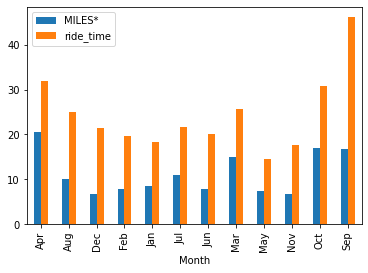

In [32]:
#Plot, the miles and durations of trips month wise

pd.pivot_table(uber_data, index=['Month']).plot(kind='bar')

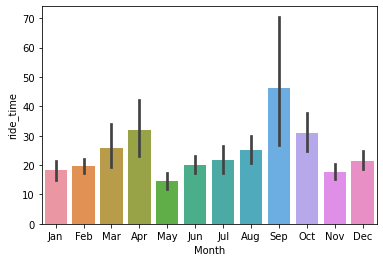

In [33]:
sns.barplot(data=uber_data, x='Month',y='ride_time')

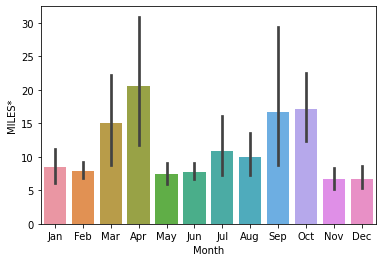

In [34]:
sns.barplot(data=uber_data, x='Month',y='MILES*')

In [35]:
#highest value of miles for the driver on month Jan

uber_data[['MILES*','Month']].head(61).max()

MILES*    63.7
Month      Jan
dtype: object

In [36]:
#highest value of miles for the driver of every month

uber_data.groupby(['Month'])['MILES*'].max()

Month
Apr    174.2
Aug    156.9
Dec    103.0
Feb     43.7
Jan     63.7
Jul    195.3
Jun     46.9
Mar    310.3
May     25.6
Nov     45.9
Oct    195.9
Sep    195.6
Name: MILES*, dtype: float64

In [37]:
#Sum of miles covered for each month

uber_data.groupby(['Month'])['MILES*'].sum()

Month
Apr    1113.0
Aug    1335.5
Dec     981.3
Feb     908.2
Jan     512.9
Jul    1224.6
Jun     842.8
Mar    1693.9
May     363.8
Nov     816.9
Oct    1810.0
Sep     601.8
Name: MILES*, dtype: float64